# MATH50003 Problem Sheet 2

This week we look at other variants of finite-differences, including central differences and second-order
finite-differences. We also investigate mathematical properties of dual numbers, extend their implementation to
other functions. Finally, we see how dual numbers can be combined with Newton iteration for root finding.

In [1]:
using ColorBitstring, SetRounding

Questions marked with a ⋆ are meant to be completed without using a computer.

## 1. Finite-differences

**Problem 1.1⋆** Use Taylor's theorem to derive an error bound for central differences
$$
f'(x) ≈ {f(x + h) - f(x - h) \over h}
$$
Find an error bound when implemented in floating point arithmetic, assuming that
$$
f^{\rm FP}(x) = f(x) + δ_x
$$
where $|δ_x| \leq c ϵ_{\rm m}$.

**Problem 1.2** Implement central differences for $f(x) = 1 + x + x^2$ and $g(x) = 1 + x/3 + x^2$. 
Plot the errors. 
Derive the error exactly for the different cases to explain the observed behaviour.


**Problem 1.3⋆** Use Taylor's theorem to derive an error bound on the second-order derivative approximation
$$
f''(x) ≈ {f(x+h) - 2f(x) + f(x-h) \over h^2}
$$
Find an error bound when implemented in floating point arithmetic, assuming that
$$
f^{\rm FP}(x) = f(x) + δ_x
$$
where $|δ_x| \leq c ϵ_{\rm m}$.

**Problem 1.4** Use finite-differences, central differences, and second-order finite-differences to approximate to 5-digits the first and second 
derivatives to the following functions:
at the point $x = 0.1$:
$$
\exp(\exp x \cos x + \sin x), \prod_{k=1}^{1000} \left({x \over k}-1\right), \hbox{ and } f^{\rm s}_{1000}(x)
$$
where $f^{\rm s}_n(x)$ corresponds to $n$-terms of the following continued fraction:
$$
1 + {x-1 \over 2 + {x-1 \over 2 + {x-1 \over 2 + \ddots}}},
$$
e.g.:
$$
\begin{align*}
f^{\rm s}_1(x) &= 1 + {x-1 \over 2} \\
f^{\rm s}_2(x) &= 1 + {x-1 \over 2 + {x -1 \over 2}} \\
f^{\rm s}_3(x) &= 1 + {x-1 \over 2 + {x -1 \over 2 + {x-1 \over 2}}}
\end{align*}
$$


**SOLUTION**

[0.029675163025407958, 0.020879070003199995, 0.000263226982400111, 0.00011258265600000428, 1.1919359999890133e-5, 1.4336000000447768e-6, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, 4.440892098500626e-16, 1.7763568394002505e-15, 2.2026824808563106e-13, 1.3304912727107876e-12, 2.000177801164682e-12, 5.751132903242251e-11, 5.751132903242251e-11, 1.21549419418443e-8, 5.445843953566509e-8, 1.6548074199818075e-7, 1.6548074199818075e-7, 6.677886221950757e-5, 0.0004883326500930707, 0.0015985556747182272, 0.10942374678779743, 0.8897769753748435, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


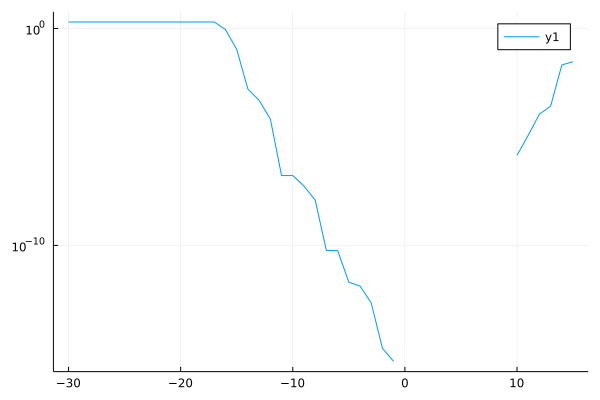

In [50]:
using Plots
using ColorBitstring, SetRounding
nanabs = x -> iszero(x) ? NaN : abs(x)
f = x -> 1 + x + x^2
g = x -> 1 + x/3 + x^2
h_arr = Vector{Float64}(vec(collect(-30:15)))
h = map(i -> i .^h_arr ,10)
h = reverse(h)
list = []
for i in h
    append!(list, (f(i) - f(-i))/i)
end
list = nanabs.(list .- 2)
println(list)
plot(reverse(h_arr), list; yscale=:log10)

In [2]:
f = x -> exp(exp(x)cos(x) + sin(x))

g = x -> prod(x ./ (1:1000) .- 1)

function cont(n, x)
    ret = 2one(x)
    for k = 1:n-1
        ret = 2 + (x-1)/ret
    end
    1 + (x-1)/ret
end

h = sqrt(eps())
(cont(1000, 0.1+h)-cont(1000, 0.1))/h

1.5811387598514557

## 2. Dual numbers

**Problem 2.1⋆** 
Show that dual numbers $𝔻$ are a _commutative ring_, that is, for all $a,b,c ∈ 𝔻$ the following are satisfied:
1. _additive associativity_: $(a + b) + c = a + (b + c)$
2. _additive commutativity_: $a + b = b + a$
3. _additive identity_: There exists $0 ∈ 𝔻$ such that $a + 0 = a$.
4. _additive inverse_: There exists $-a$ such that $(-a) + a = 0$.
5. _multiplicative associativity_: $(ab)c = a(bc)$
6. _multiplictive commutativity_: $ab = ba$
7. _multiplictive identity_: There exists $1 ∈ 𝔻$ such that $1a= a$.
8. _distributive_: $a(b+c) = ab + ac$

**Problem 2.2⋆** A _field_ is a commutative ring such that $0 ≠ 1$ and all nonzero elements have a multiplicative inverse, i.e.,
there exists $a^{-1}$ such that $a a^{-1} = 1$. Why isn't $𝔻$ a field?

**Problem 2.3⋆** A _matrix representation_ of a ring/field are maps from a group/ring/field to matrices such that matrix addition and multiplication
behaves exactly like addition and multiplication that of the ring/field. Show that the following are matrix representations of complex numbers and
dual numbers (respectively):
$$
\begin{align*}
a + b {\rm i} &\mapsto \begin{pmatrix} a & b \\ -b & a \end{pmatrix} \\
a + b {\rm i} &\mapsto \begin{pmatrix} a & b \\ 0 & a \end{pmatrix}
\end{align*}
$$


**Problem 2.4⋆** What is the correct definition of division on dual numbers, i.e.,
$$
(a + b \epsilon )/(c + d \epsilon ) = s + t \epsilon
$$
for what choice of $s$ and $t$? Use dual numbers to compute the derivative of the following functions at $x = 0.1$:
$$
\exp(\exp x \cos x + \sin x), \prod_{k=1}^3 \left({x \over k}-1\right),\hbox{ and } f^{\rm s}_2(x) = {1 + {x - 1 \over 2 + {x-1 \over 2}}}
$$


**Problem 2.5** Add support for `cos`, `sin`, and `/` to the type `Dual`:

In [51]:
# Dual(a,b) represents a + b*ϵ
struct Dual{T}
    a::T
    b::T
end

# Dual(a) represents a + 0*ϵ
Dual(a::Real) = Dual(a, zero(a)) # for real numbers we use a + 0ϵ

# Allow for a + b*ϵ syntax
const ϵ = Dual(0, 1)

import Base: +, *, -, /, ^, zero, exp, cos, sin

# support polynomials like 1 + x, x - 1, 2x or x*2 by reducing to Dual
+(x::Real, y::Dual) = Dual(x) + y
+(x::Dual, y::Real) = x + Dual(y)
-(x::Real, y::Dual) = Dual(x) - y
-(x::Dual, y::Real) = x - Dual(y)
*(x::Real, y::Dual) = Dual(x) * y
*(x::Dual, y::Real) = x * Dual(y)

# support x/2 (but not yet division of duals)
/(x::Dual, k::Real) = Dual(x.a/k, x.b/k)

# a simple recursive function to support x^2, x^3, etc.
function ^(x::Dual, k::Integer)
    if k < 0
        error("Not implemented")
    elseif k == 1
        x
    else
        x^(k-1) * x
    end
end

# Algebraic operationds for duals
-(x::Dual) = Dual(-x.a, -x.b)
+(x::Dual, y::Dual) = Dual(x.a + y.a, x.b + y.b)
-(x::Dual, y::Dual) = Dual(x.a - y.a, x.b - y.b)
*(x::Dual, y::Dual) = Dual(x.a*y.a, x.a*y.b + x.b*y.a)

exp(x::Dual) = Dual(exp(x.a), exp(x.a) * x.b)

function cos(x::Dual)
    return Dual(cos(x.a), - x.b * sin(x.a))
end

function sin(x::Dual)
    return Dual(sin(x.a), x.b * cos(x.a))
end

function /(x::Dual, y::Dual)
    return Dual(x.a / y.a, (x.b * y.a - x.a * y.b) / (y.a^2))
end

/ (generic function with 136 methods)

**Problem 2.6** Use dual numbers to compute the derivatives to
$$
\exp(\exp x \cos x + \sin x), \prod_{k=1}^{1000} \left({x \over k}-1\right), \hbox{ and } f^{\rm s}_{1000}(x).
$$
Does your answer match (to 5 digits) Problem 1.4?


## 3. Newton iteration

Newton iteration is an algorithm for computed roots of a function $f$ using its derivative: given an initial guess $x_0$, one
obtains a sequence of guesses via
$$
x_{k+1} = x_k - {f(x_k) \over f'(x_k)}
$$

**Problem 3.1** Use `Dual` to implement the following function which returns $x_n$:

In [4]:
function newton(f, x0, n)
    ## TODO: compute x_n 
end

newton (generic function with 1 method)

**Problem 3.2** Compute points $y$ such that $|f(y)| \leq 10^{-13}$ (i.e., approximate roots):
$$
\exp(\exp x \cos x + \sin x)-6\hbox{ and } \prod_{k=1}^1000 \left({x \over k}-1\right) - {1 \over 2}
$$
(Hint: you may need to try different `x0` and `n` to get convergence. Plotting the function should give an
indication of a good initial guess.)

**Problem 3.3** Compute points $y$ such that $|f^{\rm s}_{1000}(y) - j| \leq 10^{-13}$ for $j = 1,2,3$. 
Make a conjecture of what $f^{\rm s}_n(x)$ converges to as $n → ∞$. (Bonus problem: Prove your conjecture.)